# Installing and loading packages

In [15]:
#install.packages("here")
library(here, help, pos = 2, lib.loc = NULL)
source(here('Modules','modules.R'))
source(here('Modules','data_cleaning.R'))
#install_all_packages()
load_library_packages()

[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] TRUE

[[8]]
[1] TRUE

[[9]]
[1] TRUE

[[10]]
[1] TRUE

[[11]]
[1] TRUE

[[12]]
[1] TRUE

[[13]]
[1] TRUE

[[14]]
[1] TRUE

[[15]]
[1] TRUE

[[16]]
[1] TRUE

[[17]]
[1] TRUE

[[18]]
[1] TRUE

[[19]]
[1] TRUE

[[20]]
[1] TRUE

[[21]]
[1] TRUE

[[22]]
[1] TRUE

[[23]]
[1] TRUE

[[24]]
[1] TRUE

[[25]]
[1] TRUE

[[26]]
[1] TRUE

[[27]]
[1] TRUE

[[28]]
[1] TRUE

[[29]]
[1] TRUE

[[30]]
[1] TRUE

[[31]]
[1] TRUE

[[32]]
[1] TRUE

[[33]]
[1] TRUE

[[34]]
[1] TRUE

[[35]]
[1] TRUE

[[36]]
[1] TRUE

[[37]]
[1] TRUE

# Unsupervised Learning

Those model needs the one hot encoded version of our data

In [16]:
df_copy <- df
df_copy[, "strange_dp"] <- strange_dp
df_copy[, "strange_p"] <- strange_p
has_tag_depression <- df$TAG == "1" | df$depression  == "1" 
df_copy[, "has_tag_depression"] <- has_tag_depression
dummy <- dummyVars(" ~ .", data=before_dataset[, !(names(before_dataset) %in% 'PA_practice_before')])
before_encoded_dataset <- data.frame(predict(dummy, newdata =before_dataset[, !(names(before_dataset) %in% 'PA_practice_before')])) 

## PCA

In [17]:
before_encoded_dataset.pca <- prcomp(before_encoded_dataset , center = TRUE,scale. = TRUE)
summary(before_encoded_dataset.pca) 

Importance of components:
                           PC1     PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     2.76630 2.28647 2.23249 2.13296 1.95648 1.90842 1.88476
Proportion of Variance 0.05427 0.03708 0.03535 0.03227 0.02715 0.02583 0.02519
Cumulative Proportion  0.05427 0.09135 0.12670 0.15896 0.18611 0.21194 0.23714
                           PC8     PC9    PC10    PC11   PC12    PC13    PC14
Standard deviation     1.81407 1.77758 1.73780 1.68886 1.6454 1.64137 1.60685
Proportion of Variance 0.02334 0.02241 0.02142 0.02023 0.0192 0.01911 0.01831
Cumulative Proportion  0.26047 0.28288 0.30430 0.32453 0.3437 0.36284 0.38115
                          PC15   PC16    PC17   PC18    PC19   PC20    PC21
Standard deviation     1.58606 1.5710 1.55669 1.5484 1.53173 1.5251 1.49176
Proportion of Variance 0.01784 0.0175 0.01719 0.0170 0.01664 0.0165 0.01578
Cumulative Proportion  0.39899 0.4165 0.43368 0.4507 0.46733 0.4838 0.49960
                          PC22    PC23    

Seems that PC1 and PC2 do not explain much about out that variance. TSNE could be a better solution

### Colouring exercise practice before the pandemic

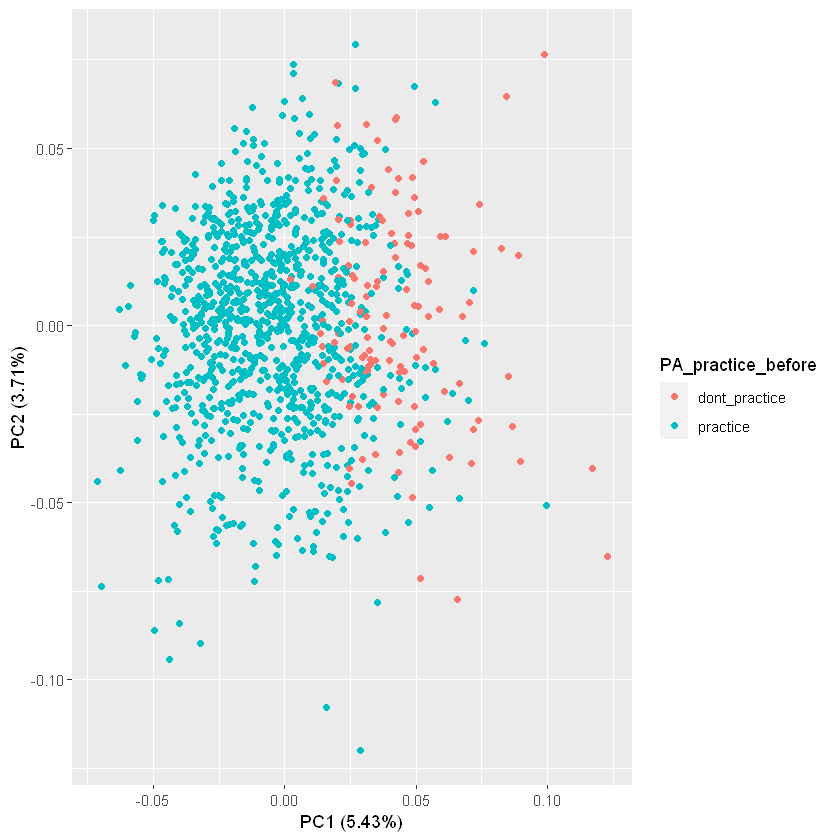

In [18]:
autoplot(before_encoded_dataset.pca, colour="PA_practice_before", data=before_dataset)

## TSNE

In [19]:
set.seed(2)
tsne <- Rtsne(before_encoded_dataset, dims = 2, perplexity=100, check_duplicates = FALSE, verbose=TRUE)

Performing PCA
Read the 1242 x 50 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 100.000000, and theta = 0.500000
Computing input similarities...
Building tree...
Done in 1.44 seconds (sparsity = 0.325711)!
Learning embedding...
Iteration 50: error is 57.589330 (50 iterations in 0.79 seconds)
Iteration 100: error is 57.589330 (50 iterations in 0.65 seconds)
Iteration 150: error is 57.589345 (50 iterations in 0.96 seconds)
Iteration 200: error is 57.589337 (50 iterations in 1.15 seconds)
Iteration 250: error is 57.589337 (50 iterations in 1.39 seconds)
Iteration 300: error is 2.314204 (50 iterations in 1.37 seconds)
Iteration 350: error is 1.421624 (50 iterations in 0.63 seconds)
Iteration 400: error is 1.364603 (50 iterations in 0.48 seconds)
Iteration 450: error is 1.353996 (50 iterations in 0.48 seconds)
Iteration 500: error is 1.344658 (50 iterations in 0.68 seconds)
Iteration 550: error is 1.342942 (50 iterations in 0.50 seconds)
Iteration 6

### Colouring exercise practice before the pandemic

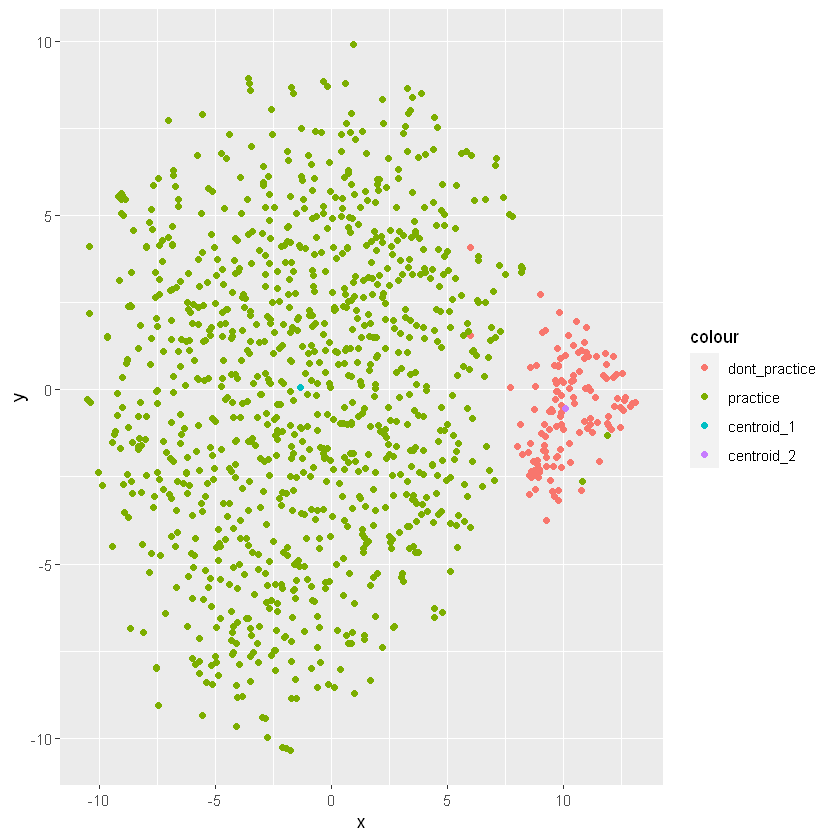

In [20]:
metadata <- data.frame(sample_id = rownames(df_copy),
                       colour = df_copy$PA_practice_before )


main_tsne_df <- data.frame(
    x = tsne$Y[,1],
    y = tsne$Y[,2],
    colour = metadata$colour)

tsne_df_centroids <- main_tsne_df
# Defining the practice centroid points
practice_centroid_x <- mean(tsne_df_centroids[tsne_df_centroids["colour"] == "practice", ]$x)
practice_centroid_y <- mean(tsne_df_centroids[tsne_df_centroids["colour"] == "practice", ]$y)

# Defining the dont_practice centroid points
dont_practice_centroid_x <- mean(tsne_df_centroids[tsne_df_centroids["colour"] == "dont_practice", ]$x)
dont_practice_centroid_y <- mean(tsne_df_centroids[tsne_df_centroids["colour"] == "dont_practice", ]$y)

# Adding centroids to dataset
levels(tsne_df_centroids$colour) <- c(levels(tsne_df_centroids$colour), "centroid_1", "centroid_2")

# Plotting the data points
tsne_df_centroids[nrow(tsne_df_centroids) + 1, ] <- list(practice_centroid_x, practice_centroid_y, "centroid_1")
tsne_df_centroids[nrow(tsne_df_centroids) + 1, ] <- list(dont_practice_centroid_x, dont_practice_centroid_y, "centroid_2")
ggplot(tsne_df_centroids, aes(x, y, colour = colour)) + geom_point()


### Colouring exercise practice during the pandemic

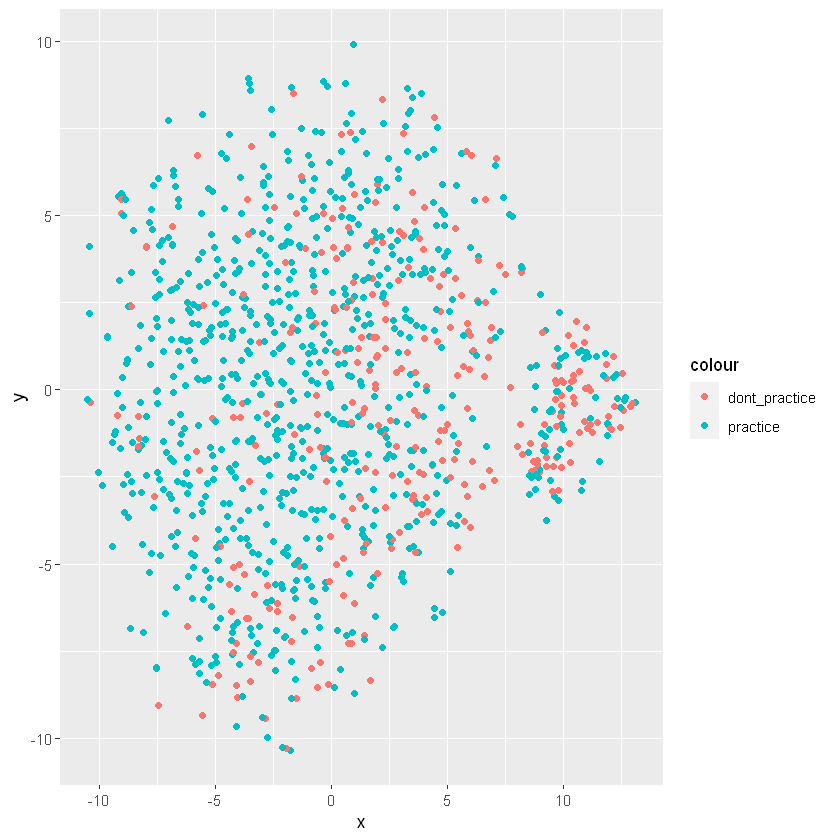

In [21]:
metadata <- data.frame(sample_id = rownames(df_copy),
                       colour = df_copy$PA_practice_during )
tsne_df <- data.frame(
    x = tsne$Y[,1],
    y = tsne$Y[,2],
    colour = metadata$colour)

ggplot(tsne_df, aes(x, y, colour = colour)) + geom_point()

Clusters now are not well defined

### Strange don't practice

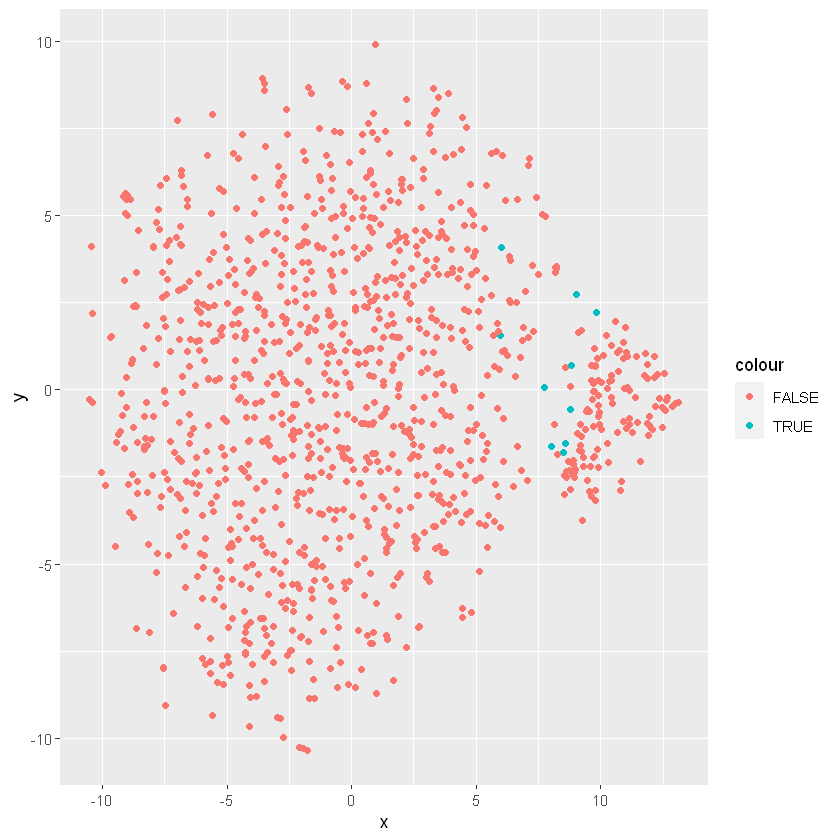

In [22]:
metadata <- data.frame(sample_id = rownames(df_copy),
                       colour = df_copy$strange_dp)
tsne_df <- data.frame(
    x = tsne$Y[,1],
    y = tsne$Y[,2],
    colour = metadata$colour)

ggplot(tsne_df, aes(x, y, colour = colour)) + geom_point()

### Strange practice

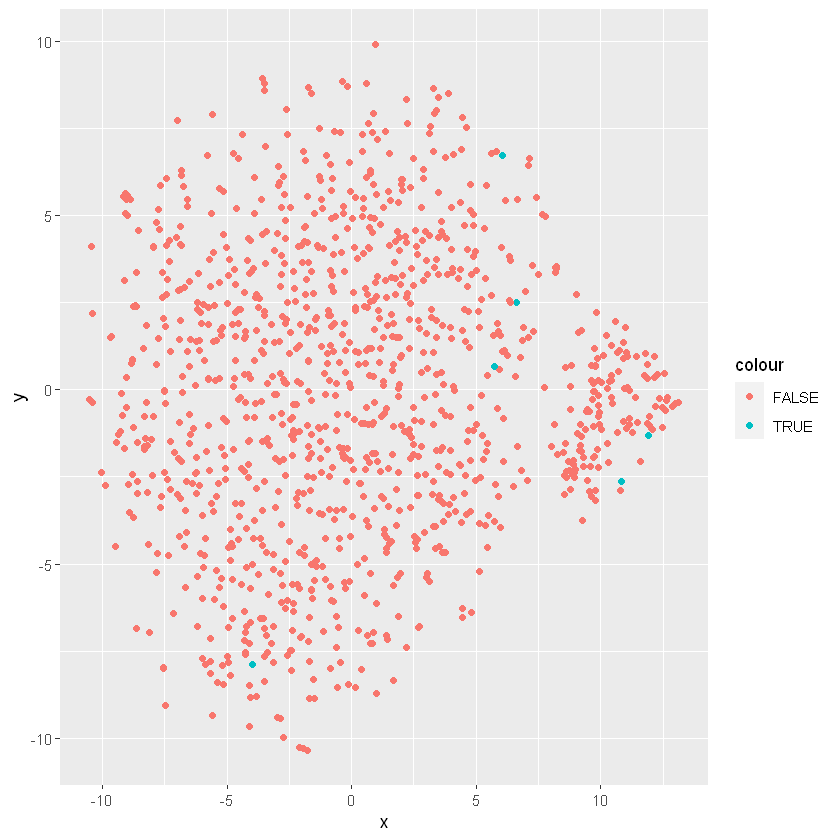

In [23]:
metadata <- data.frame(sample_id = rownames(df_copy),
                       colour = df_copy$strange_p)
tsne_df <- data.frame(
    x = tsne$Y[,1],
    y = tsne$Y[,2],
    colour = metadata$colour)

ggplot(tsne_df, aes(x, y, colour = colour)) + geom_point()

### Has tag or depression

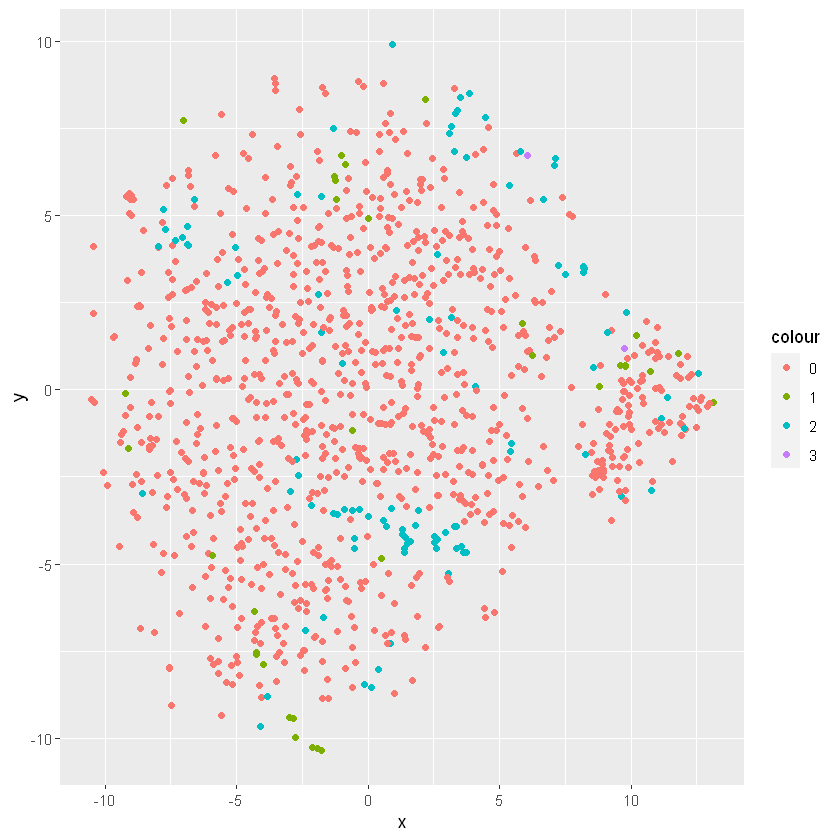

In [24]:
metadata <- data.frame(sample_id = rownames(df_copy),
                       colour = df_copy$depression_anxiety)
tsne_df <- data.frame(
    x = tsne$Y[,1],
    y = tsne$Y[,2],
    colour = metadata$colour)

ggplot(tsne_df, aes(x, y, colour = colour)) + geom_point()

## Rejecting the outliers 

### Finding the distance between centroinds and outliers 

In [25]:
distances_sdp <- distance_to_centroids(main_tsne_df, strange_dp, "practice", "dont_practice")
distances_sp <- distance_to_centroids(main_tsne_df, strange_p, "practice", "dont_practice")
